Data cleaning using the code from RevenueBudgetAnalysis.ipynb

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
revenueDf = pd.read_csv("data/fy24-adopted-revenue-budget.csv")
revenueDf = revenueDf.dropna(axis=1)
null_res = pd.isnull(revenueDf)
dset_non_dup = revenueDf.drop_duplicates()
money_cols = revenueDf.iloc[:,-4:].columns
revenueDf[money_cols] = revenueDf[money_cols].replace(regex=',', value='')
revenueDf[money_cols] = revenueDf[money_cols].apply(pd.to_numeric)

revenueDf

,Revenue Category,Account,Cabinet,Department,FY21 Actual,FY22 Actual,FY23 Appropriation,FY24 Adopted
0,Property Tax Levy,Real Estate Taxes,Finance,Assessing Department,2490082613,2630469593,2784133324,2913736657
1,Property Tax Levy,Personal Property Tax,Finance,Assessing Department,189939113,196499737,209010762,214236031
2,Property Tax Levy,Property Tax Overlay,Finance,Assessing Department,-3735387,-33174590,-29845007,-30000000
3,Excises,MV Excise - Current Year,Finance,Assessing Department,36012943,36227381,34000000,34000000
4,Excises,MV Excise - Prior Year,Finance,Assessing Department,15202795,21692077,17500000,18000000
...,...,...,...,...,...,...,...,...
194,Available Funds,Approp. Cemetery Trust Fund,"Environment, Energy & Open Space",Parks & Recreation Department,0,0,950000,950000
195,Available Funds,Approp. Parking Meters,Streets,Transportation Department,20000000,0,30000000,30000000
196,Non-Recurring Revenue,American Rescue Plan,Finance,Auditing Department,0,55000000,40000000,0
197,Non-Recurring Revenue,Approp. Fund Balance,Finance,Auditing Department,40000000,0,40000000,40000000


In [100]:
print(revenueDf['Department'].nunique())
print(revenueDf['Department'].unique())
print(revenueDf['Cabinet'].unique())
print(revenueDf['Revenue Category'].unique())

42
['Assessing Department' 'Treasury Department' 'Transportation Department'
 'Library Department' 'Fire Department' 'Inspectional Services Department'
 'Property Management Department' 'Public Facilities Department'
 'Police Department' 'Public Works Department' 'Law Department'
 "Mayor's Office of Housing" 'Boston Center for Youth & Families'
 'Registry Division' 'City Clerk' 'Health Insurance'
 'Parks & Recreation Department' 'Department of Innovation and Technology'
 'Auditing Department' 'Boston Public Schools' 'Budget Management'
 'Human Resources' 'Procurement' 'Retirement Board'
 'Environment Department' 'Office for Immigrant Advancement'
 'Fair Housing & Equity' 'Leading the Way' "Mayor's Office"
 'Consumer Affairs & Licensing' 'Election Department'
 'Execution of Courts' 'Office of Labor Relations'
 "Workers' Compensation Fund" 'Office of Arts & Culture'
 'Neighborhood Services' 'Office of Economic Opportunity & Inclusion'
 'Boston VETS' 'City Council' 'Central Fleet Manageme

In [101]:
capitalDf = pd.read_csv("data/fy24-capital-budget-plan-recommended.csv")
capitalDf = capitalDf.drop_duplicates()
capitalDf.fillna(0, inplace=True)
capitalDf['Total_Project_Budget'] = pd.to_numeric(capitalDf['Total_Project_Budget'], errors='coerce')
# Handling any new missing values after conversion
capitalDf['Total_Project_Budget'].fillna(capitalDf['Total_Project_Budget'].median(), inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#encoding categories into numericla values
#df['Department'] = le.fit_transform(df['Department'])

#for text data processing, if needed, for example, making all text lowercase, removing punctuation, etc.
capitalDf['Scope_Of_Work'] = capitalDf['Scope_Of_Work'].str.lower().str.replace('[^\w\s]', '')

# Further steps such as handling outliers, feature engineering, etc., can be added as needed.
print(capitalDf['Department'].nunique())
print(capitalDf['Department'].unique())

17
['Boston Centers for Youth and Families'
 'Boston Planning and Development Agency' 'Boston Public Library'
 'Boston Public Schools' 'Department of Innovation and Technology'
 'Emergency Management' 'Environment Department' 'Fire Department'
 "Mayor's Office of Housing" 'Office of Arts & Culture'
 'Office of New Urban Mechanics' 'Parks and Recreation Department'
 'Police Department' 'Property Management Department'
 'Public Health Commission' 'Public Works Department'
 'Transportation Department']


['Assessing Department' 'Treasury Department' 'Transportation Department'
 'Library Department' 'Fire Department' 'Inspectional Services Department'
 'Property Management Department' 'Public Facilities Department'
 'Police Department' 'Public Works Department' 'Law Department'
 "Mayor's Office of Housing" 'Boston Center for Youth & Families'
 'Registry Division' 'City Clerk' 'Health Insurance'
 'Parks & Recreation Department' 'Department of Innovation and Technology'
 'Auditing Department' 'Boston Public Schools' 'Budget Management'
 'Human Resources' 'Procurement' 'Retirement Board'
 'Environment Department' 'Office for Immigrant Advancement'
 'Fair Housing & Equity' 'Leading the Way' "Mayor's Office"
 'Consumer Affairs & Licensing' 'Election Department'
 'Execution of Courts' 'Office of Labor Relations'
 "Workers' Compensation Fund" 'Office of Arts & Culture'
 'Neighborhood Services' 'Office of Economic Opportunity & Inclusion'
 'Boston VETS' 'City Council' 'Central Fleet Management'
 'Snow & Winter Management' 'Licensing Board']


```[
 'Boston Planning and Development Agency'
 'Boston Public Schools' 
 'Department of Innovation and Technology'
 'Office of New Urban Mechanics' 
 'Boston Public Health Commission'
]


 [ 
 'Mayors Cabinet' 
 'People Operations' 
 'Non-Mayoral Departments'
 'Information & Technology'
 'Equity & Inclusion Cabinet'
 ]

In [102]:

# capitalDf['Department'] = capitalDf['Department'].str.replace('Boston Centers for Youth and Families', 'Boston Center for Youth & Families')
# capitalDf['Department'] = capitalDf['Department'].str.replace('Boston Public Library', 'Library Department')
# capitalDf['Department'] = capitalDf['Department'].str.replace('Boston Public Library', 'Library Department')



# Mapping values from df1 to df2
capitalDf['Department'] = capitalDf['Department'].replace({
    'Boston Centers for Youth and Families': 'Boston Center for Youth & Families',
    'Boston Planning and Development Agency': 'Planning and Development Agency',
    'Boston Public Library': 'Library Department',
    'Boston Public Schools': 'Boston Public Schools',
    'Department of Innovation and Technology': 'Department of Innovation and Technology',
    'Emergency Management': 'Emergency Management',
    'Environment Department': 'Environment Department',
    'Fire Department': 'Fire Department',
    "Mayor's Office of Housing": "Mayor's Office of Housing",
    'Office of Arts & Culture': 'Office of Arts & Culture',
    'Office of New Urban Mechanics': 'Office of New Urban Mechanics',
    'Parks and Recreation Department': 'Parks & Recreation Department',
    'Police Department': 'Police Department',
    'Property Management Department': 'Property Management Department',
    'Public Health Commission': 'Public Health Commission',
    'Public Works Department': 'Public Works Department',
    'Transportation Department': 'Transportation Department'
})

In [103]:
# Create the 'Total Revenue' column
revenueDf['Total Revenue'] = revenueDf[['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']].sum(axis=1)

# Keep only 'Department' and 'Total Revenue'
revenueDf = revenueDf[['Department', 'Total Revenue']]
revenueDf = revenueDf.groupby('Department')['Total Revenue'].sum().reset_index()

columns_to_keep = ['Department', 'Total_Project_Budget']

# Keep only the specified columns
capitalDf = capitalDf[columns_to_keep]
capitalDf = capitalDf.groupby('Department')['Total_Project_Budget'].sum().reset_index()
capitalDf

,Department,Total_Project_Budget
0,Boston Center for Youth & Families,203475000.0
1,Boston Public Schools,904255151.0
2,Department of Innovation and Technology,83686892.0
3,Emergency Management,1500000.0
4,Environment Department,172032167.0
5,Fire Department,152147500.0
6,Library Department,154290000.0
7,Mayor's Office of Housing,208000000.0
8,Office of Arts & Culture,20975000.0
9,Office of New Urban Mechanics,200000.0


In [104]:
df = revenueDf.merge(capitalDf, on='Department', how='inner')
df = df.fillna(0)
df

,Department,Total Revenue,Total_Project_Budget
0,Boston Center for Youth & Families,113868,203475000.0
1,Boston Public Schools,16999960,904255151.0
2,Department of Innovation and Technology,31211759,83686892.0
3,Environment Department,955029,172032167.0
4,Fire Department,30070503,152147500.0
5,Library Department,26794,154290000.0
6,Mayor's Office of Housing,5331215,208000000.0
7,Office of Arts & Culture,1543,20975000.0
8,Parks & Recreation Department,3748620,331889348.0
9,Police Department,18251812,81421000.0


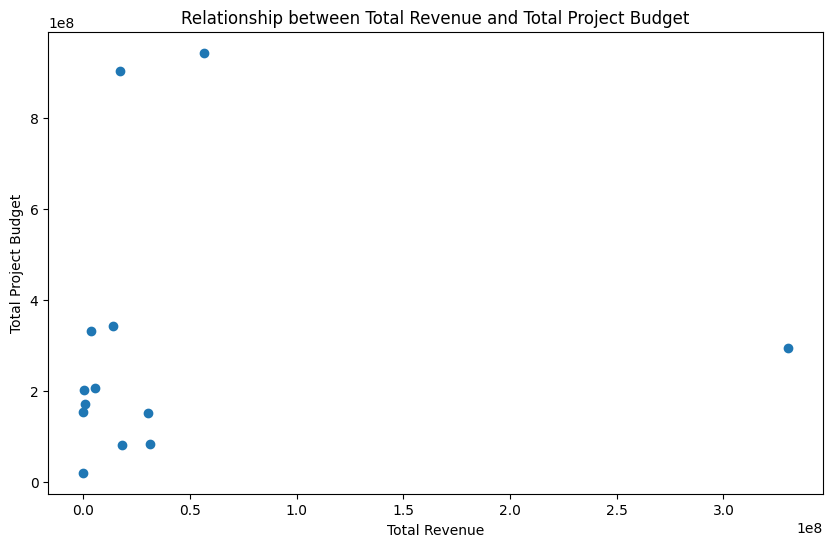

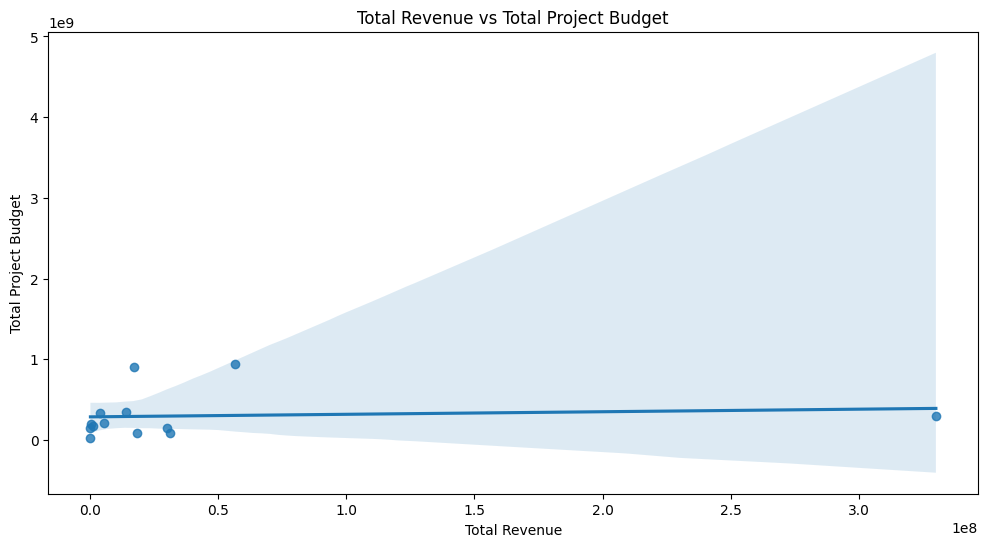

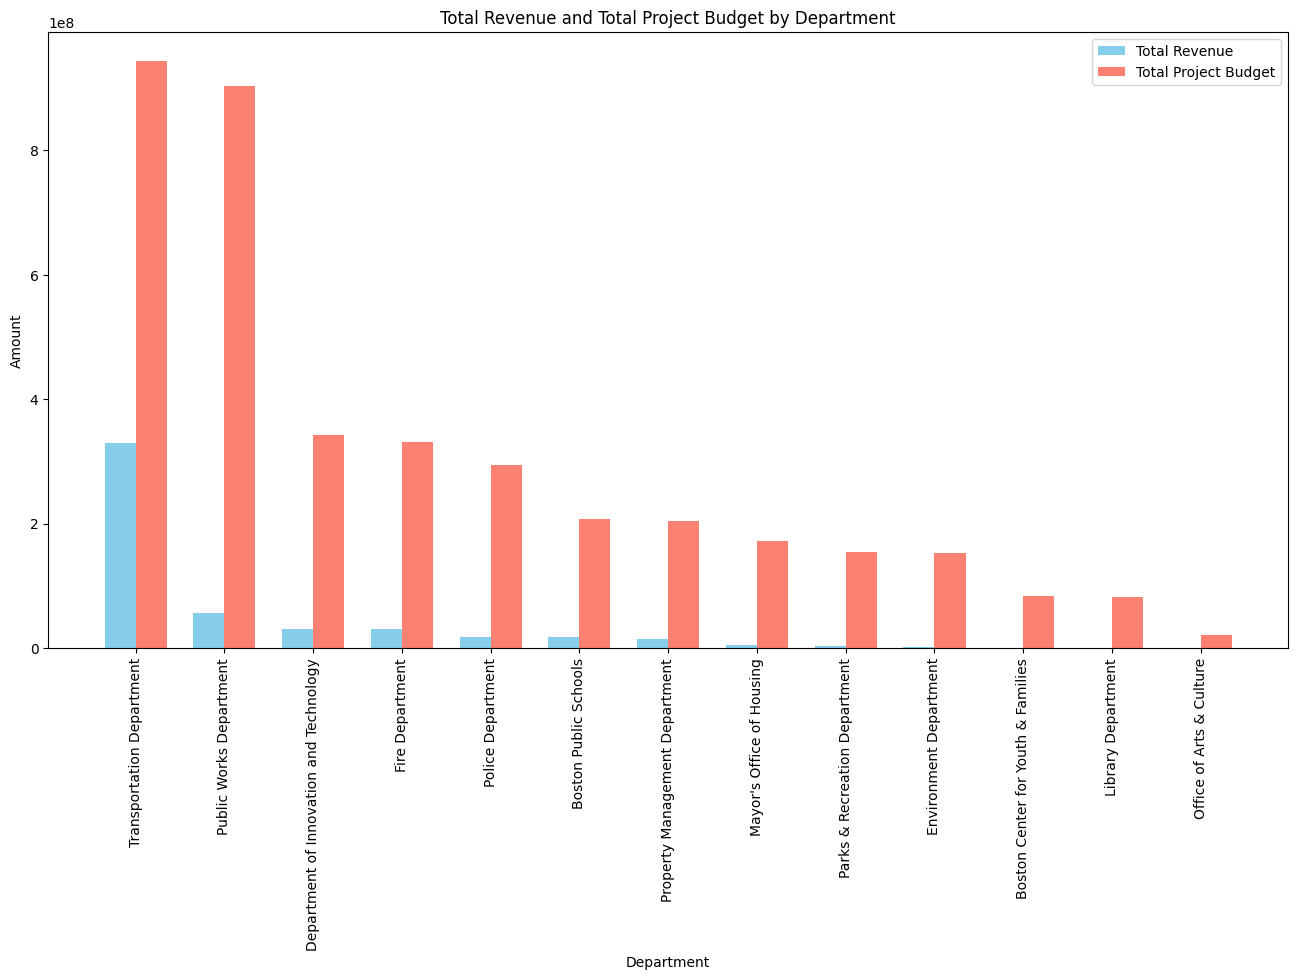

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_graphs(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Total Revenue'], df['Total_Project_Budget'])
    plt.xlabel('Total Revenue')
    plt.ylabel('Total Project Budget')
    plt.title('Relationship between Total Revenue and Total Project Budget')
    plt.show()

    # Scatter plot with regression line
    plt.figure(figsize=(12, 6))
    sns.regplot(x='Total Revenue', y='Total_Project_Budget', data=df)
    plt.title('Total Revenue vs Total Project Budget')
    plt.xlabel('Total Revenue')
    plt.ylabel('Total Project Budget')
    plt.show()

    # Sort the dataframe by Total Revenue
    df_sorted_by_revenue = df.sort_values(by='Total Revenue', ascending=False)

    # Sort the dataframe by Total Project Budget
    df_sorted_by_budget = df.sort_values(by='Total_Project_Budget', ascending=False)

    # Set the width of the bars
    bar_width = 0.35

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(16, 8))

    # Bar plot for Total Revenue
    bar1 = ax.bar(np.arange(len(df_sorted_by_revenue)), df_sorted_by_revenue['Total Revenue'], bar_width, label='Total Revenue', color='skyblue')

    # Bar plot for Total Project Budget
    bar2 = ax.bar(np.arange(len(df_sorted_by_budget)) + bar_width, df_sorted_by_budget['Total_Project_Budget'], bar_width, label='Total Project Budget', color='salmon')

    # Set the x-axis ticks and labels
    ax.set_xticks(np.arange(len(df_sorted_by_revenue)) + bar_width / 2)
    ax.set_xticklabels(df_sorted_by_revenue['Department'], rotation=90)

    # Add labels, title, and legend
    ax.set_xlabel('Department')
    ax.set_ylabel('Amount')
    ax.set_title('Total Revenue and Total Project Budget by Department')
    ax.legend()

    plt.show()

plot_graphs(df)

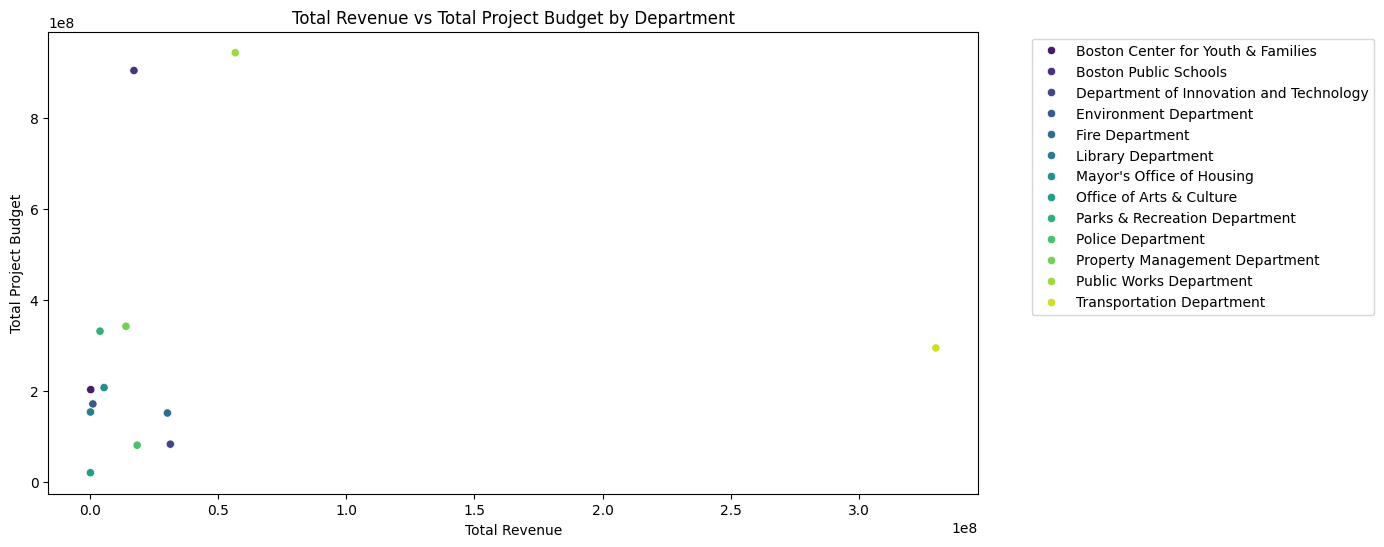

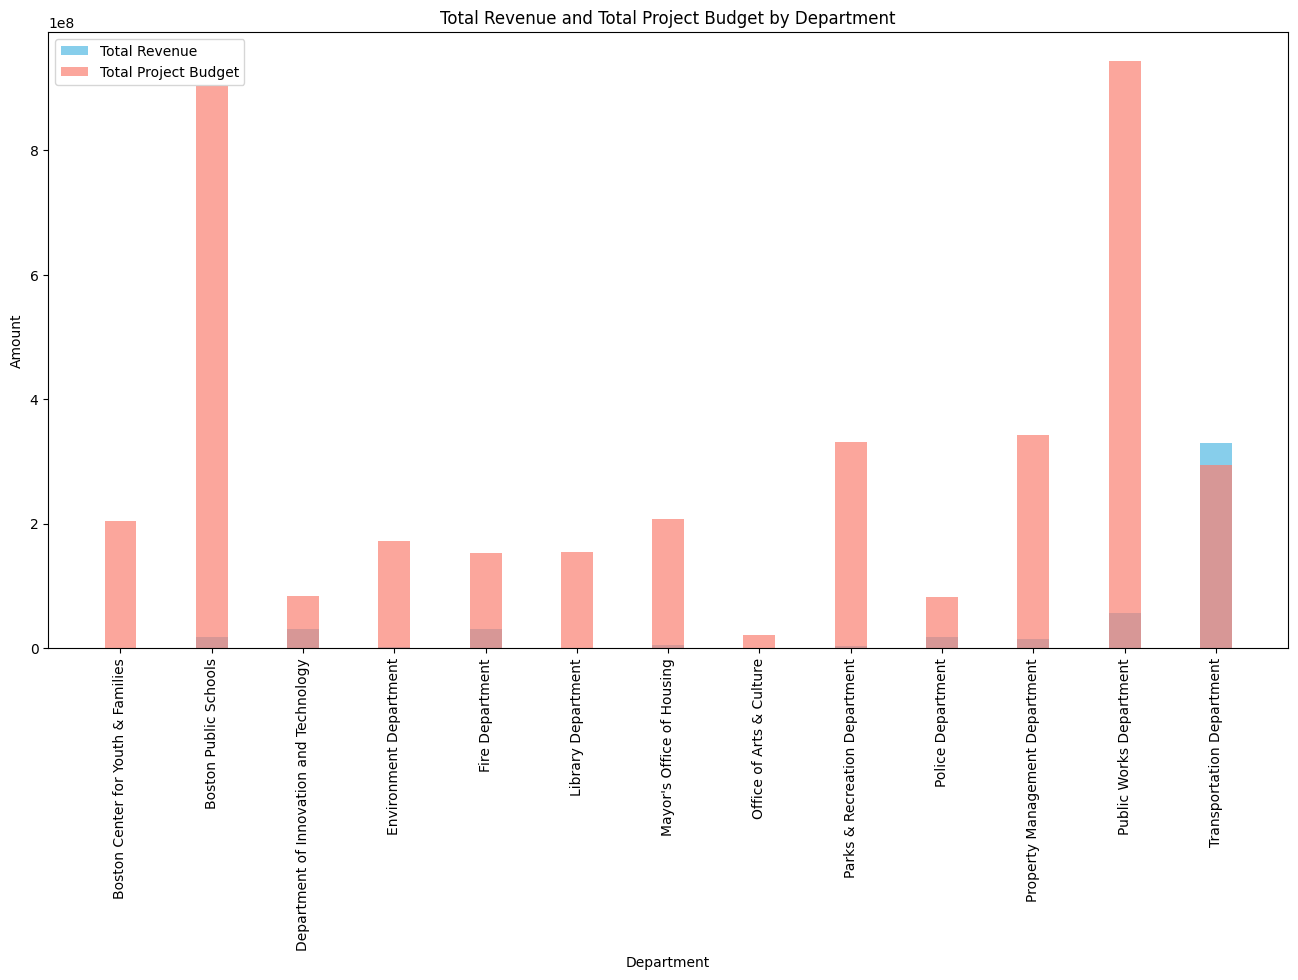

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with Total Revenue and Total Project Budget
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total Revenue', y='Total_Project_Budget', hue='Department', data=df, palette='viridis', legend='full')
plt.title('Total Revenue vs Total Project Budget by Department')
plt.xlabel('Total Revenue')
plt.ylabel('Total Project Budget')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Bar plot for Total Revenue and Total Project Budget by Department
plt.figure(figsize=(16, 8))
bar_width = 0.35

# Bar plot for Total Revenue
bar1 = plt.bar(df['Department'], df['Total Revenue'], bar_width, label='Total Revenue', color='skyblue')

# Bar plot for Total Project Budget
bar2 = plt.bar(df['Department'], df['Total_Project_Budget'], bar_width, label='Total Project Budget', color='salmon', alpha=0.7)

plt.title('Total Revenue and Total Project Budget by Department')
plt.xlabel('Department')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.legend()

plt.show()


<Figure size 1000x800 with 0 Axes>

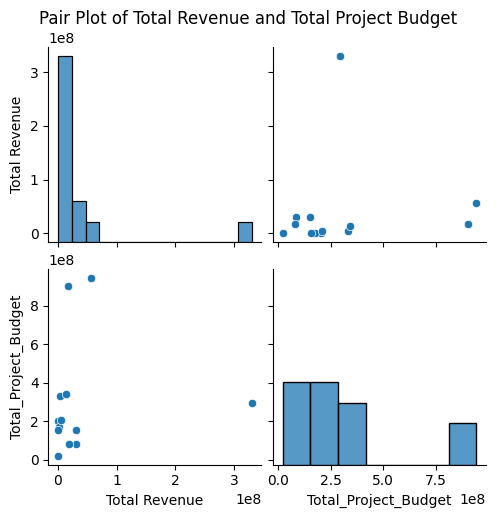

In [110]:
# Selecting only Total Revenue and Total Project Budget columns
df_subset = df[['Total Revenue', 'Total_Project_Budget']]

# Pair plot for Total Revenue and Total Project Budget
plt.figure(figsize=(10, 8))
sns.pairplot(df_subset)
plt.suptitle('Pair Plot of Total Revenue and Total Project Budget', y=1.02)
plt.show()


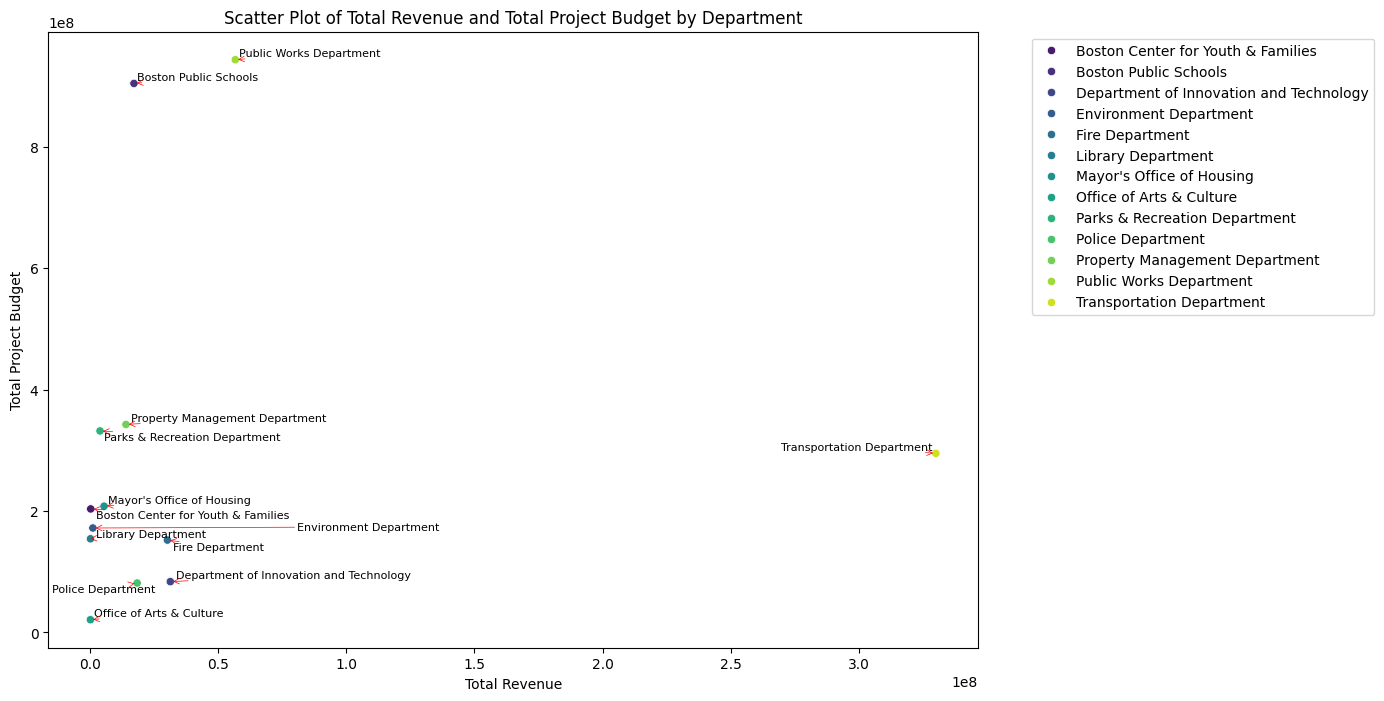

In [117]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Scatter plot with Total Revenue and Total Project Budget, including department labels
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Total Revenue', y='Total_Project_Budget', hue='Department', data=df, palette='viridis')
plt.title('Scatter Plot of Total Revenue and Total Project Budget by Department')
plt.xlabel('Total Revenue')
plt.ylabel('Total Project Budget')

# Annotating each point with the department name
texts = []
for i, row in df.iterrows():
    texts.append(plt.text(row['Total Revenue'], row['Total_Project_Budget'], row['Department'], fontsize=8))

# Use adjust_text to optimize text placement
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='red', lw=0.5))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



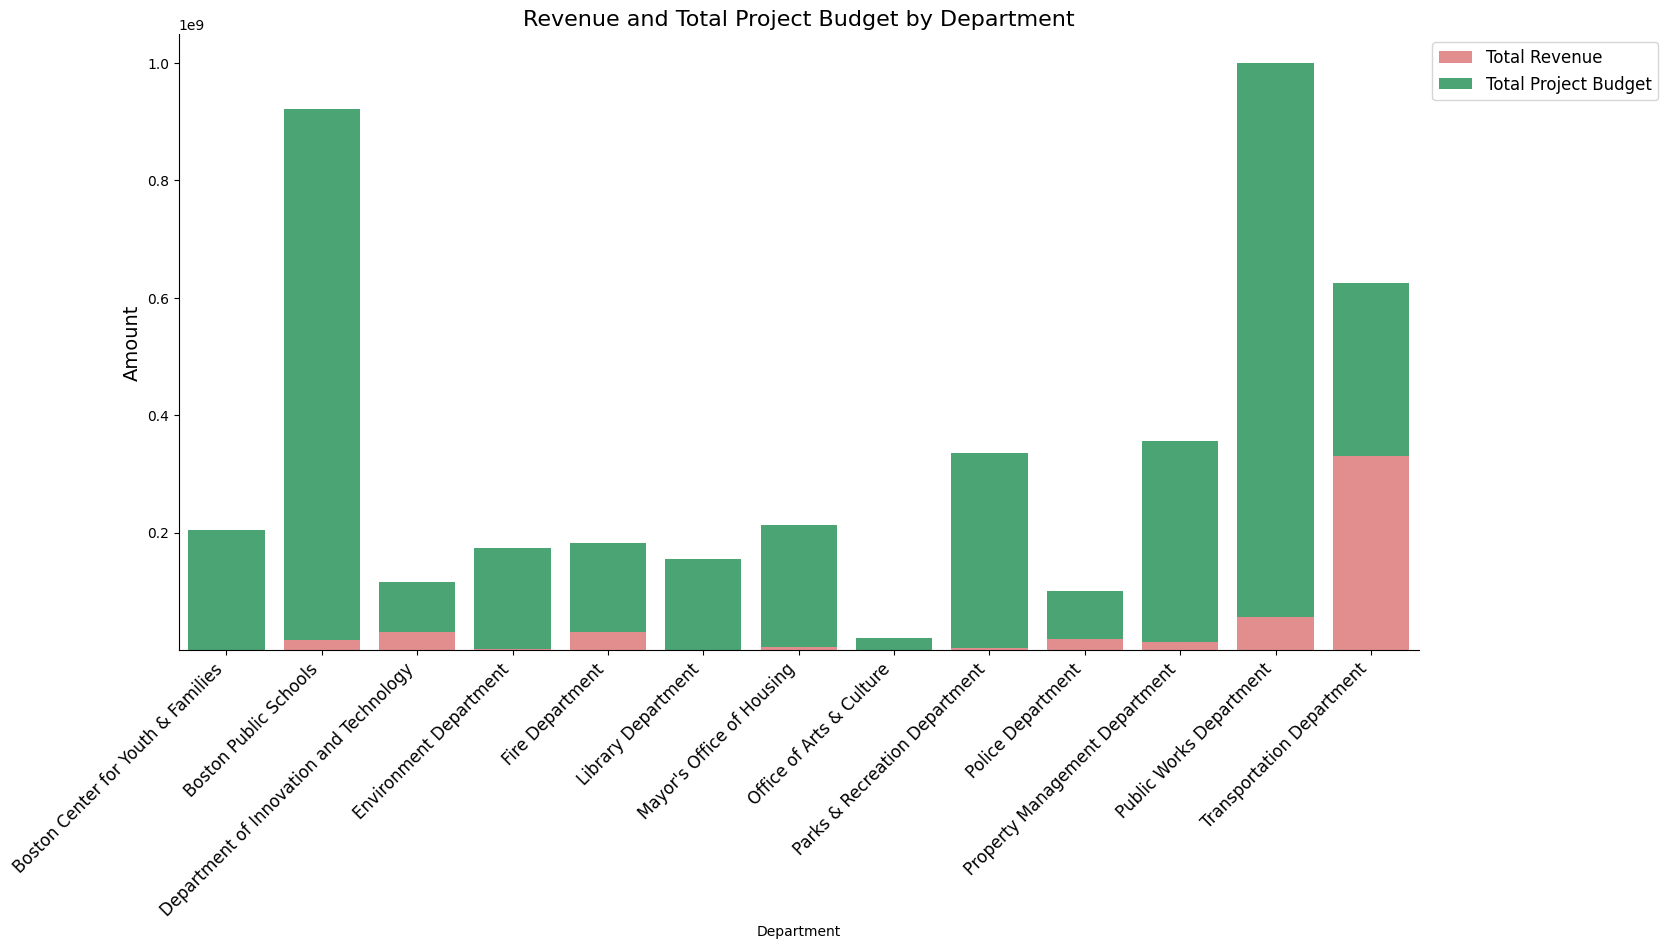

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# color palette
colors = ['lightcoral', 'mediumseagreen', 'lightskyblue', 'mediumpurple', 'black']
plt.figure(figsize=(16, 8))

sns.barplot(x='Department', y='Total Revenue', data=df, color=colors[0], label='Total Revenue')
sns.barplot(x='Department', y='Total_Project_Budget', data=df, color=colors[1], label='Total Project Budget', bottom=df['Total Revenue'])

# labels and title with updated font size
plt.ylabel('Amount', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Revenue and Total Project Budget by Department', fontsize=16)

# legend with updated font size
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12)

# remove top and right spines
sns.despine()

plt.show()


In [95]:
df2 = revenueDf.merge(capitalDf, on='Department', how='outer')
df2 = df2.fillna(0)
df2


,Department,Total Revenue,Total_Project_Budget
0,Assessing Department,1.201457e+10,0.0
1,Auditing Department,2.438788e+08,0.0
2,Boston Center for Youth & Families,1.138680e+05,203475000.0
3,Boston Public Schools,1.699996e+07,904255151.0
4,Boston VETS,2.909000e+03,0.0
5,Budget Management,2.949584e+07,0.0
6,Central Fleet Management,2.230000e+02,0.0
7,City Clerk,2.129289e+06,0.0
8,City Council,1.246200e+04,0.0
9,Consumer Affairs & Licensing,2.405303e+07,0.0


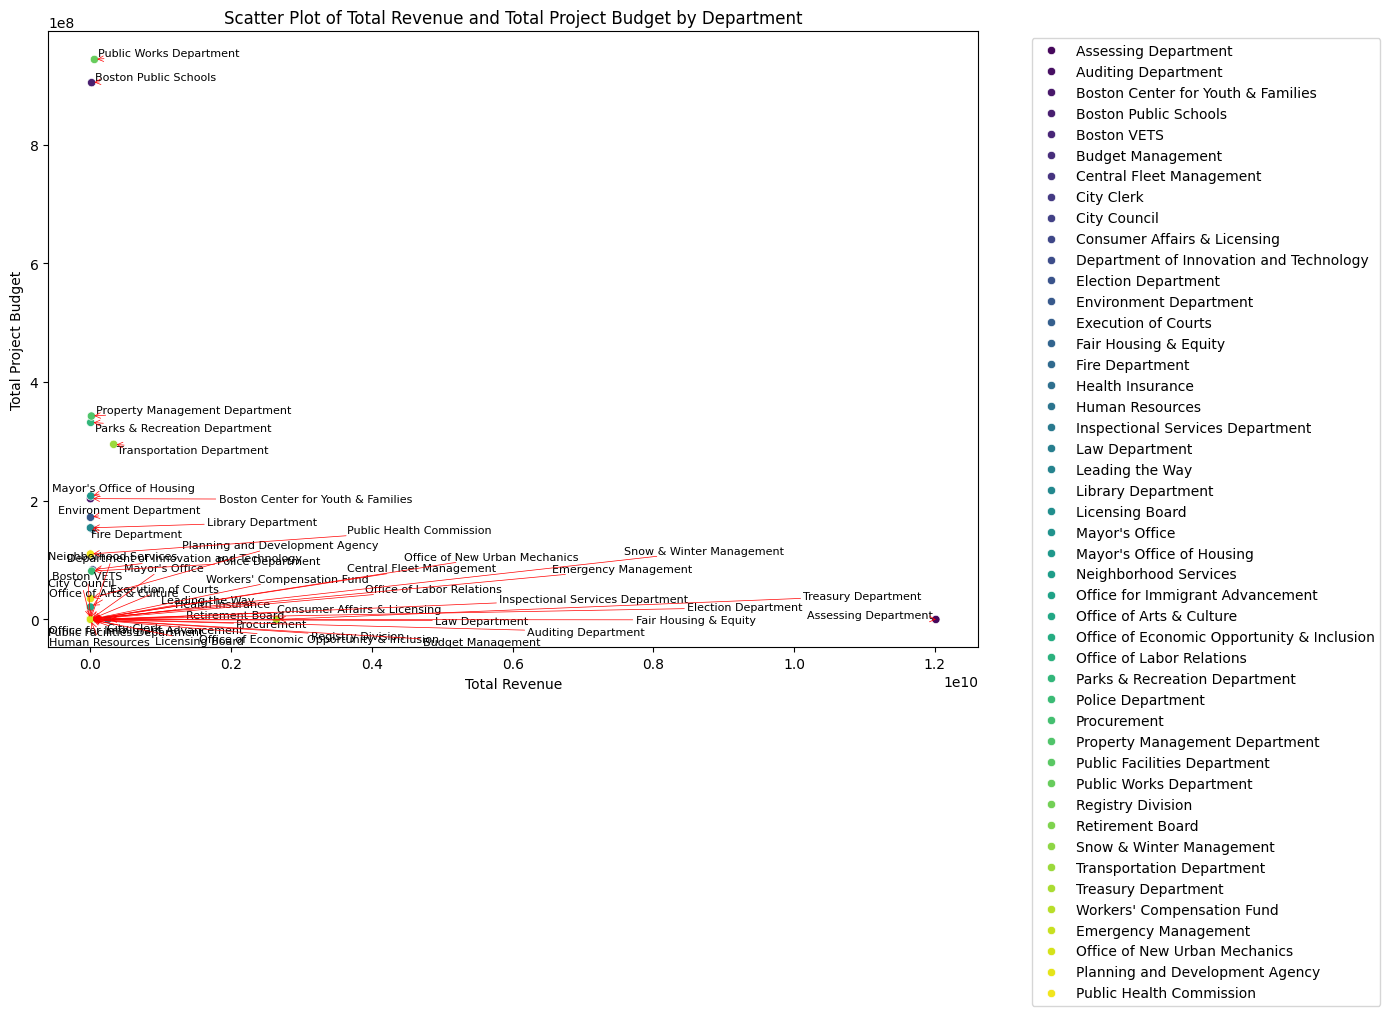

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Scatter plot with Total Revenue and Total Project Budget, including department labels
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Total Revenue', y='Total_Project_Budget', hue='Department', data=df2, palette='viridis')
plt.title('Scatter Plot of Total Revenue and Total Project Budget by Department')
plt.xlabel('Total Revenue')
plt.ylabel('Total Project Budget')
texts = []
for i, row in df2.iterrows():
    texts.append(plt.text(row['Total Revenue'], row['Total_Project_Budget'], row['Department'], fontsize=8))

# Use adjust_text to optimize text placement
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='red', lw=0.5))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



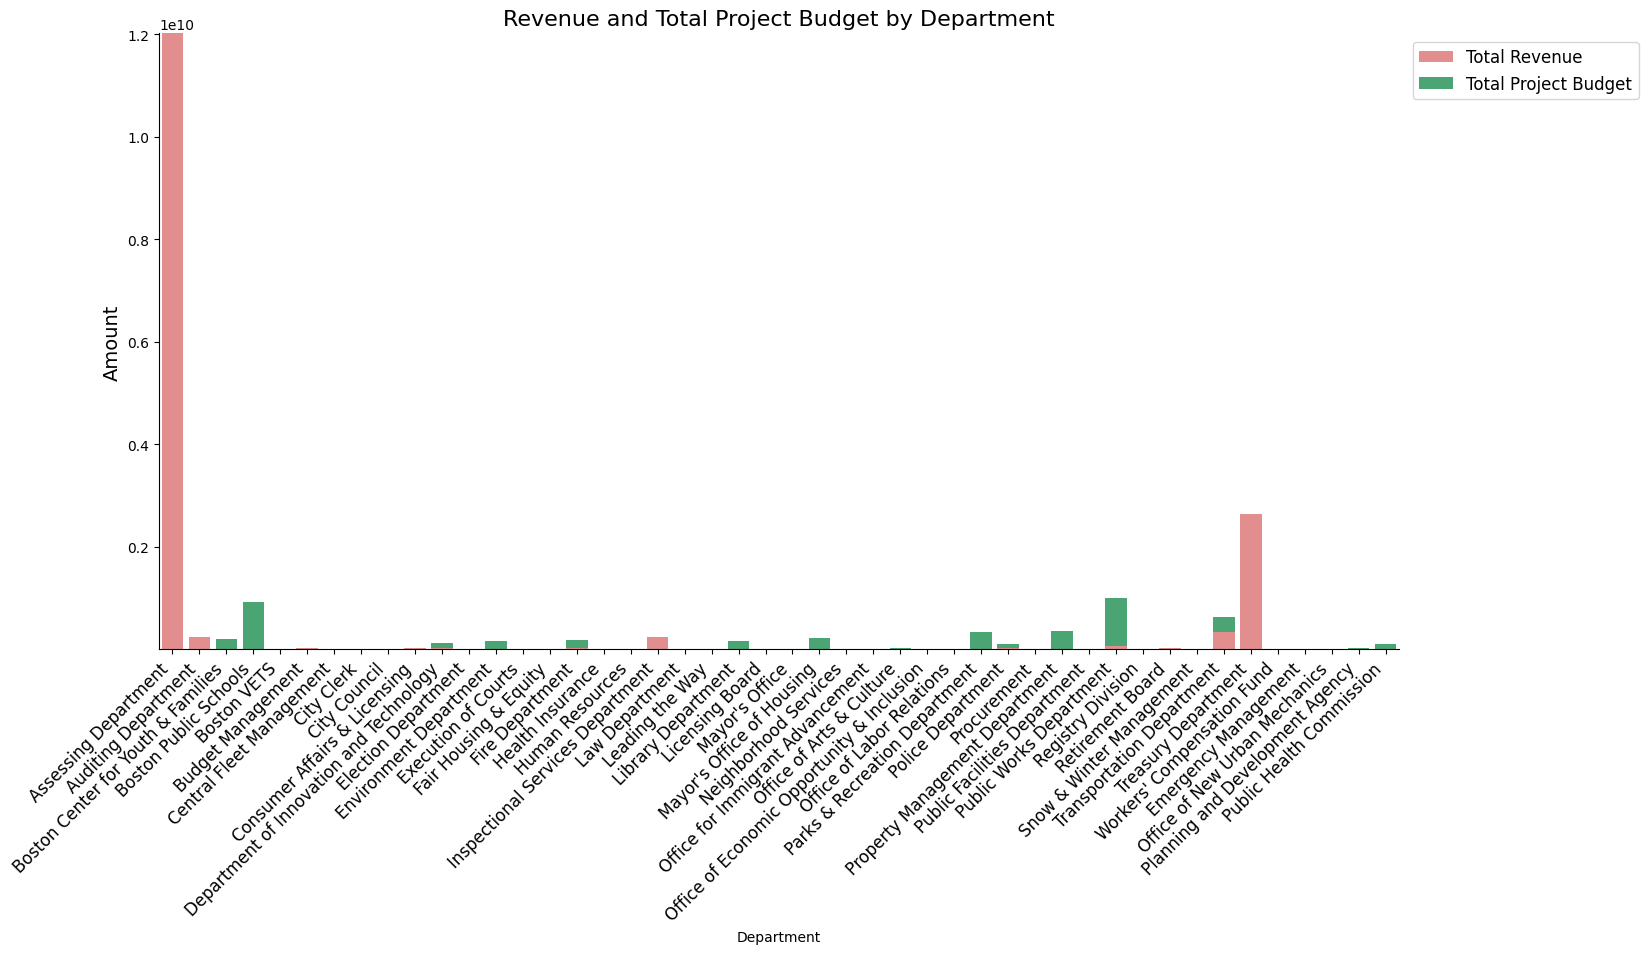

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# color palette
colors = ['lightcoral', 'mediumseagreen', 'lightskyblue', 'mediumpurple', 'black']
plt.figure(figsize=(16, 8))

sns.barplot(x='Department', y='Total Revenue', data=df2, color=colors[0], label='Total Revenue')
sns.barplot(x='Department', y='Total_Project_Budget', data=df2, color=colors[1], label='Total Project Budget', bottom=df2['Total Revenue'])

# labels and title with updated font size
plt.ylabel('Amount', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Revenue and Total Project Budget by Department', fontsize=16)

# legend with updated font size
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12)

# remove top and right spines
sns.despine()

plt.show()

https://www.boston.gov/departments/311/city-boston-government#cabinets

In [31]:
# # new_row = {'Revenue Category': 'Other', 'Account': 'Other', 'Cabinet': 'Other', 
# #            'Department': 'Other', 'FY21 Actual': 0, 'FY22 Actual': 0, 'FY23 Appropriation': 0, 'FY24 Adopted': 0}

# # # Insert the new row at the end of the DataFrame
# # revenueDf.loc[len(revenueDf.index)] = new_row

# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Boston Public Library', 'Arts and Culture')
# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Office of Arts and Culture', 'Arts and Culture')

# # Community Engagement Cabinet : 311, CITY HALL TO GO, NEIGHBORHOOD SERVICES
# # capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('', 'Community Engagement')

# # Communications : PRESS OFFICE
# # capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('', 'Communications')

# # Economic Opportunity & Inclusion : CONSUMER AFFAIRS AND LICENSING, ECONOMIC OPPORTUNITY AND INCLUSION, LICENSING BOARD, TOURISM, SPORTS, AND ENTERTAINMENT
# # capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('', 'Economic Opportunity & Inclusion')

# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Environment Department', 'Environment, Energy & Open Space')
# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Parks and Recreation Department', 'Environment, Energy & Open Space')


# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Property Management Department', 'Operations')
# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Public Facilities Department', 'Operations')

# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Public Works Department', 'Streets')
# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Boston Transportation Department', 'Streets')
# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Public Works Department', 'Streets')

# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Boston Public Library', 'Human Services')
# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Boston Centers for Youth and Families', 'Human Services')
# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Youth Engagement and Employment', 'Human Services')


# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Boston Fire Department', 'Public Safety')
# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Boston Police Department', 'Public Safety')
# capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace('Boston Fire Department', 'Public Safety')

# # theres nothing online about this mapping, I'm just putting them together because they have housing in the name
# # capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace("Mayor's Office of Housing", 'Housing')
# # capitalDf['PM_Department'] = capitalDf['PM_Department'].str.replace("Boston Housing Authority", 'Housing')

In [36]:
# Find values in revenueDf's column that are not in capitalDf's column
val_in_rev = revenueDf[~revenueDf['Department'].isin(capitalDf['PM_Department'])]
print(val_in_rev['Department'].nunique())
print(val_in_rev['Department'].unique())

# Find values in capitalDf's column that are not in revenueDf's column
val_in_cap = capitalDf[~capitalDf['PM_Department'].isin(revenueDf['Department'])]
print(val_in_cap['PM_Department'].nunique())
print(val_in_cap['PM_Department'].unique())

34
['Assessing Department' 'Treasury Department' 'Transportation Department'
 'Library Department' 'Fire Department' 'Inspectional Services Department'
 'Law Department' 'Boston Center for Youth & Families' 'Registry Division'
 'City Clerk' 'Health Insurance' 'Parks & Recreation Department'
 'Auditing Department' 'Budget Management' 'Human Resources' 'Procurement'
 'Retirement Board' 'Office for Immigrant Advancement'
 'Fair Housing & Equity' 'Leading the Way' "Mayor's Office"
 'Consumer Affairs & Licensing' 'Election Department'
 'Execution of Courts' 'Office of Labor Relations'
 "Workers' Compensation Fund" 'Office of Arts & Culture'
 'Neighborhood Services' 'Office of Economic Opportunity & Inclusion'
 'Boston VETS' 'City Council' 'Central Fleet Management'
 'Snow & Winter Management' 'Licensing Board']
12
['Boston Centers for Youth and Families' 'Youth Engagement and Employment'
 'Boston Planning and Development Agency' 'Boston Public Library'
 'Boston Fire Department' 'Office of A